# Analysing returns of automobile companies 

### Companies analysed:
Bajaj Auto, Eicher Motors, Tata Motors, Maruti Suzuki, Mahindra & Mahindra

### Ratios used:
sharpe ratio, sortino ratio

### Lookback period:
June 2021 to May 2022

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from tabulate import tabulate
import matplotlib.pyplot as plt

# data=web.DataReader(['AAPL','BAJAJ-AUTO.BO','MARUTI.BO','EICHERMOT.BO','M&M.BO','TATAMOTORS.BO'], data_source='yahoo', start='2021-6-1', end='2022-5-31')['Adj Close']
# print(data)

def sharpe_ratio(stocks, stdt, endt, rfr):
    data=pd.DataFrame()
    returns=pd.DataFrame()
    sharpe=list()
    for company in stocks:
        data[company]=web.DataReader(company, data_source='yahoo', start=stdt, end=endt)['Adj Close'] '''getting stock data'''
        returns[company]=data[company].pct_change()                                                   '''daily return'''
        company_nr=(data[company][-1]/data[company][0])-1                                             '''net return over the period'''
        std_dev_company=returns[company].std()*np.sqrt(252)                                           '''standard deviation'''
        sharpe_company=(company_nr-rfr)/std_dev_company                                               '''getting the ratio'''
        sharpe.append(sharpe_company)
        
    return sharpe

def sortino_ratio(stocks, stdt, endt, rfr):
    data=pd.DataFrame()
    data=web.DataReader(stocks, data_source='yahoo', start=stdt, end=endt)['Adj Close']
    sortino=list()
    for i in stocks:
        data['daily_return_'+i]=data[i].pct_change()                       '''gettning daily return'''
        data['dd_'+i]=data[data['daily_return_'+i]<0]['daily_return_'+i]   '''filtering the downside deviation data'''
        return_i=np.prod(data['daily_return_'+i]+1)-1                      '''calculating return'''
        dd_i=data['dd_'+i].std()*np.sqrt(252)                              '''downside deviation'''
        sortino_i=(return_i-rfr/100)/dd_i                                  '''getting the ratio'''
        sortino.append(sortino_i)
    
    return sortino
        
    
#         print(tabulate
#              ([
#                  ['Stock', 'Net Return(%)', 'Standard Deviation(%)', 'Sharpe Ratio'],
#                  [company, round(company_nr,4)*100, round(std_dev_company,4)*100, sharpe_company]
#               ],
#               headers='firstrow')
#              )
#         print('\n')

#### Taking risk free rate as 4.40% (SBI FD rate for 1 year) for convinience 

In [2]:
stock=['BAJAJ-AUTO.BO','MARUTI.BO','EICHERMOT.BO','M&M.BO','TATAMOTORS.BO']

In [3]:
sharpe=sharpe_ratio(stock, '2021-6-1', '2022-5-31', 0.0440)


In [4]:
sortino=sortino_ratio(stock, '2021-6-1', '2022-5-31', 0.0440)

<function matplotlib.pyplot.show(close=None, block=None)>

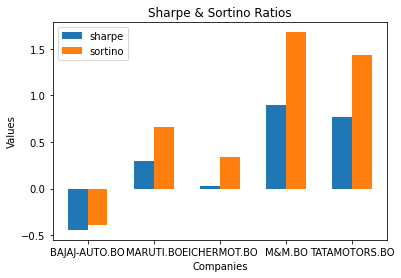

In [5]:
w=0.3
bar1=np.arange(len(stock))
bar2=[i+w for i in bar1]

plt.bar(bar1, sharpe, w, label='sharpe')
plt.bar(bar2, sortino, w, label='sortino')

plt.xticks(bar1+w/2, stock)
plt.xlabel('Companies')
plt.ylabel('Values')
plt.title('Sharpe & Sortino Ratios')
plt.legend() 

plt.show